<a href="https://colab.research.google.com/github/rkgupta7463/ML-projects-code/blob/main/Human_Emotion_Classification(ResNet50)%20v-2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# !mkdir -p ~/.kaggle
# !cp kaggle.json ~/.kaggle/

In [5]:
# !kaggle datasets download -d sanidhyak/human-face-emotions

In [6]:
# import zipfile
# zip = zipfile.ZipFile("/content/human-face-emotions.zip",'r')
# zip.extractall("/content")
# zip.close()

In [7]:
import os
import numpy as np
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator
from PIL import Image
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

In [8]:
# Set the path to your dataset folders
happy_path = '/content/data/Happy'
sad_path = '/content/data/Sad'
angry_path = '/content/data/Angry'

In [9]:
# Function to load and preprocess images
def load_images(folder_path, label):
    images = []
    labels = []
    for filename in os.listdir(folder_path):
        img_path = os.path.join(folder_path, filename)
        img = Image.open(img_path)
        img_resized = np.resize(np.array(img), (200, 200, 3))  # Resize images to a consistent size
        images.append(img_resized)
        labels.append(label)
    return images, labels

# Load and preprocess images from each emotion folder
happy_images, happy_labels = load_images(happy_path, 0)
sad_images, sad_labels = load_images(sad_path, 1)
angry_images, angry_labels = load_images(angry_path, 2)

# Combine the images and labels from all emotion categories
images = np.concatenate([happy_images, sad_images, angry_images])
labels = np.concatenate([happy_labels, sad_labels, angry_labels])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Normalize pixel values to the range [0, 1]
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Convert labels to categorical format
num_classes = 3  # Happy, Sad, Angry
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [10]:
X_train.shape

(212, 200, 200, 3)

In [11]:
from keras.applications import ResNet50
from keras.layers import *
from keras.models import Model
import keras

In [12]:
resnet = ResNet50(include_top=False, input_shape=(200,200,3))

94765736/94765736 [==============================] - 0s 0us/step


In [13]:
resnet = ResNet50(include_top=False, input_shape=(200,200,3))

resnet.trainable=False

output = resnet.layers[-1].output

flatten = Flatten()(output)

dense1 = Dense(512, activation='relu')(flatten)
dense2 = Dense(512,activation='relu')(flatten)

dense3 = Dense(512,activation='relu')(dense1)
dense4 = Dense(512,activation='relu')(dense2)

output = Dense(3,activation='softmax')(dense4)

In [14]:
model = Model(inputs=resnet.input,outputs=output)

In [15]:
model.compile(optimizer='adam', loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [16]:
history=model.fit(X_train,y_train,epochs=50,validation_data=(X_test,y_test))

Epoch 1/50
7/7 [==============================] - 17s 596ms/step - loss: 19.3440 - accuracy: 0.3585 - val_loss: 16.3214 - val_accuracy: 0.3019
Epoch 2/50
7/7 [==============================] - 1s 115ms/step - loss: 11.4563 - accuracy: 0.2500 - val_loss: 6.0365 - val_accuracy: 0.4340
Epoch 3/50
7/7 [==============================] - 1s 114ms/step - loss: 4.3713 - accuracy: 0.3066 - val_loss: 1.7358 - val_accuracy: 0.3208
Epoch 4/50
7/7 [==============================] - 1s 142ms/step - loss: 2.1310 - accuracy: 0.3019 - val_loss: 2.0268 - val_accuracy: 0.3019
Epoch 5/50
7/7 [==============================] - 1s 143ms/step - loss: 1.6134 - accuracy: 0.3774 - val_loss: 1.9135 - val_accuracy: 0.4340
Epoch 6/50
7/7 [==============================] - 1s 115ms/step - loss: 1.3966 - accuracy: 0.3821 - val_loss: 1.0856 - val_accuracy: 0.3396
Epoch 7/50
7/7 [==============================] - 1s 113ms/step - loss: 1.0878 - accuracy: 0.4340 - val_loss: 1.2054 - val_accuracy: 0.2830
Epoch 8/50
7/7 [

In [17]:
y_pred=model.predict(X_test)

2/2 [==============================] - 1s 105ms/step


In [75]:
loss, accuracy = model.evaluate(X_train,y_train)

print(f"Train Loss: {loss:.4f}")
print(f"Train Accuracy: {accuracy:.4f}")
# model.evaluate(X_train,y_train)

7/7 [==============================] - 1s 84ms/step - loss: 1.0864 - accuracy: 0.3726
Train Loss: 1.0864
Train Accuracy: 0.3726


In [76]:
loss, accuracy = model.evaluate(X_test,y_test)

print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")
# model.evaluate(X_test,y_test)

2/2 [==============================] - 0s 137ms/step - loss: 1.0960 - accuracy: 0.4340
Test Loss: 1.0960
Test Accuracy: 0.4340


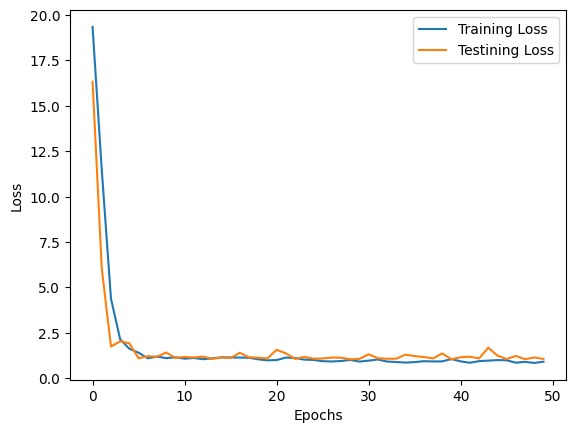

In [21]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'],label='Training Loss')
plt.plot(history.history['val_loss'],label='Testining Loss')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

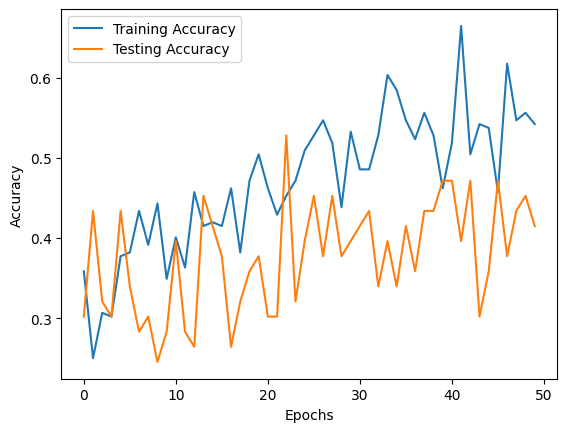

In [22]:
plt.plot(history.history['accuracy'],label='Training Accuracy')
plt.plot(history.history['val_accuracy'],label='Testing Accuracy')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

Dumping this model

In [59]:
model.save("CV_Model.h5")

In [23]:
import cv2 as cv
import matplotlib.pyplot as plt
from keras.utils import img_to_array,array_to_img

In [27]:
img=cv.imread('face-smiling.webp')

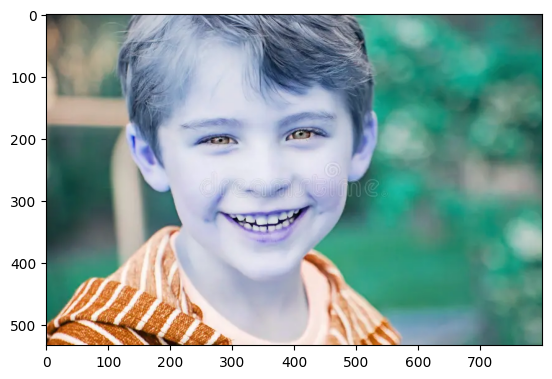

In [28]:
plt.imshow(img)

In [29]:
sample_img=img_to_array(img)

# Resize the image to match the model's input shape (e.g., 500)
sample_img = cv.resize(sample_img, (200, 200))

# Normalize the pixel values to the range [0, 1]
sample_img = sample_img.astype(np.float32) / 255.0

# Reshape the image to a single-sample batch with the appropriate shape
sample_img = np.expand_dims(sample_img, axis=0)

# Now you can use the model to predict on the sample_img
predictions = model.predict(sample_img)

1/1 [==============================] - 1s 564ms/step


In [30]:
predictions*100

array([[78.71335  , 14.343654 ,  6.9430037]], dtype=float32)

In [31]:
s={'Happy':predictions[0][0],
   'Sad':predictions[0][1],
   'Angery':predictions[0][2]}

In [32]:
pd.DataFrame([s],index=['Unknow Boys'])

,Happy,Sad,Angery
Unknow Boys,0.787133,0.143437,0.06943


In [35]:
img1=cv.imread('rishu.jpeg')

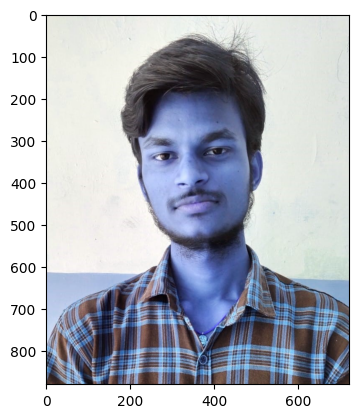

In [36]:
plt.imshow(img1)

In [37]:
sample_img=img_to_array(img1)

# Resize the image to match the model's input shape (e.g., 500)
sample_img = cv.resize(sample_img, (200, 200))

# Normalize the pixel values to the range [0, 1]
sample_img = sample_img.astype(np.float32) / 255.0

# Reshape the image to a single-sample batch with the appropriate shape
sample_img = np.expand_dims(sample_img, axis=0)

# Now you can use the model to predict on the sample_img
predictions1 = model.predict(sample_img)

1/1 [==============================] - 0s 36ms/step


In [38]:
predictions1*100

array([[48.88224 , 43.70115 ,  7.416617]], dtype=float32)

In [41]:
s={'Happy':predictions1[0][0]*100,
   'Sad':predictions1[0][1]*100,
   'Angery':predictions1[0][2]*100}

In [42]:
pd.DataFrame([s],index=['Rishu'])

,Happy,Sad,Angery
Rishu,48.88224,43.701148,7.416617


In [43]:
# Input layer
input_shape = (200, 200, 3)
input_tensor = Input(shape=input_shape)

# Pre-trained ResNet50 base
base_model = ResNet50(include_top=False, weights='imagenet', input_tensor=input_tensor)

# Freeze the layers of the pre-trained ResNet50
for layer in base_model.layers:
    layer.trainable = False

# Get the output of the last layer of the base model
output = base_model.layers[-1].output

# Flatten the output
flatten = Flatten()(output)

# Fully connected layers
dense1 = Dense(512, activation='relu')(flatten)
dense2 = Dense(512, activation='relu')(dense1)

# Additional fully connected layers for feature combination
dense3 = Dense(256, activation='relu')(dense2)

# Final output layer for classification
output_layer = Dense(3, activation='softmax')(dense3)

# Create the improved model
improved_model = Model(inputs=input_tensor, outputs=output_layer)

# Compile the model
improved_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
improved_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 200, 200, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 206, 206, 3)  0           ['input_3[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 100, 100, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

In [44]:
## improved model
history1=model.fit(X_train,y_train,epochs=50,validation_data=(X_test,y_test))

Epoch 1/50
7/7 [==============================] - 1s 170ms/step - loss: 0.8723 - accuracy: 0.5849 - val_loss: 1.1864 - val_accuracy: 0.3962
Epoch 2/50
7/7 [==============================] - 1s 118ms/step - loss: 0.8582 - accuracy: 0.5708 - val_loss: 1.0811 - val_accuracy: 0.4906
Epoch 3/50
7/7 [==============================] - 1s 115ms/step - loss: 0.8349 - accuracy: 0.5896 - val_loss: 1.1911 - val_accuracy: 0.3962
Epoch 4/50
7/7 [==============================] - 1s 116ms/step - loss: 0.8338 - accuracy: 0.6085 - val_loss: 1.2103 - val_accuracy: 0.3774
Epoch 5/50
7/7 [==============================] - 1s 116ms/step - loss: 0.8791 - accuracy: 0.5849 - val_loss: 1.1171 - val_accuracy: 0.4717
Epoch 6/50
7/7 [==============================] - 1s 117ms/step - loss: 0.8977 - accuracy: 0.5802 - val_loss: 1.2612 - val_accuracy: 0.4340
Epoch 7/50
7/7 [==============================] - 1s 130ms/step - loss: 0.9702 - accuracy: 0.4906 - val_loss: 1.1179 - val_accuracy: 0.3962
Epoch 8/50
7/7 [====

In [45]:

# Input layer
input_shape = (200, 200, 3)
input_tensor = Input(shape=input_shape)

# Pre-trained ResNet50 base
base_model = ResNet50(include_top=False, weights='imagenet', input_tensor=input_tensor)

# Freeze the layers of the pre-trained ResNet50
for layer in base_model.layers:
    layer.trainable = False

# Get the output of the last layer of the base model
output = base_model.layers[-1].output

# Flatten the output
flatten = Flatten()(output)

# Fully connected layers
dense1 = Dense(512, activation='relu')(flatten)
dense2 = Dense(512, activation='relu')(dense1)

# Additional fully connected layers for feature combination
dense3 = Dense(256, activation='relu')(dense2)

# Final output layer for classification
output_layer = Dense(3, activation='softmax')(dense3)

# Create the improved model
improved_model1 = Model(inputs=input_tensor, outputs=output_layer)

# Compile the model
improved_model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
improved_model1.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 200, 200, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 206, 206, 3)  0           ['input_4[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 100, 100, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

In [46]:
history2=improved_model1.fit(X_train,y_train,epochs=50,validation_data=(X_test,y_test))

Epoch 1/50
7/7 [==============================] - 7s 405ms/step - loss: 12.9430 - accuracy: 0.3632 - val_loss: 6.9471 - val_accuracy: 0.3019
Epoch 2/50
7/7 [==============================] - 1s 143ms/step - loss: 5.6061 - accuracy: 0.3302 - val_loss: 2.4550 - val_accuracy: 0.4340
Epoch 3/50
7/7 [==============================] - 1s 117ms/step - loss: 2.1329 - accuracy: 0.3302 - val_loss: 1.3413 - val_accuracy: 0.3019
Epoch 4/50
7/7 [==============================] - 1s 117ms/step - loss: 1.4947 - accuracy: 0.3538 - val_loss: 1.2353 - val_accuracy: 0.4340
Epoch 5/50
7/7 [==============================] - 1s 118ms/step - loss: 1.3555 - accuracy: 0.3302 - val_loss: 1.5932 - val_accuracy: 0.2642
Epoch 6/50
7/7 [==============================] - 1s 118ms/step - loss: 1.6602 - accuracy: 0.3349 - val_loss: 1.4165 - val_accuracy: 0.4340
Epoch 7/50
7/7 [==============================] - 1s 143ms/step - loss: 1.1756 - accuracy: 0.4434 - val_loss: 1.1394 - val_accuracy: 0.4151
Epoch 8/50
7/7 [===

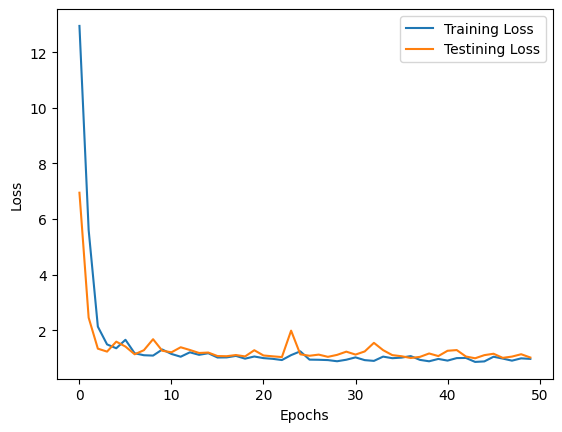

In [47]:
plt.plot(history2.history['loss'],label='Training Loss')
plt.plot(history2.history['val_loss'],label='Testining Loss')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

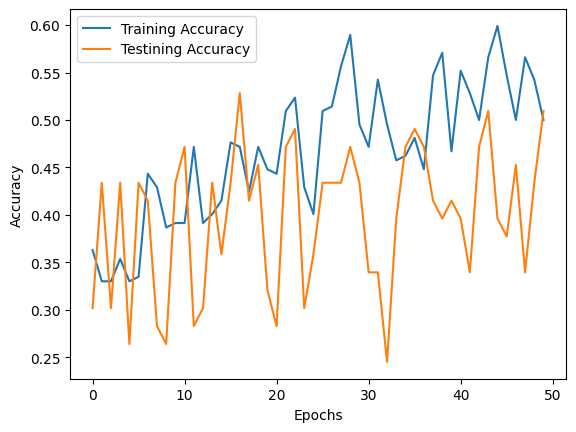

In [61]:
plt.plot(history2.history['accuracy'],label='Training Accuracy')
plt.plot(history2.history['val_accuracy'],label='Testining Accuracy')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

In [50]:
sample_img=img_to_array(img1)

# Resize the image to match the model's input shape (e.g., 500)
sample_img = cv.resize(sample_img, (200, 200))

# Normalize the pixel values to the range [0, 1]
sample_img = sample_img.astype(np.float32) / 255.0

# Reshape the image to a single-sample batch with the appropriate shape
sample_img = np.expand_dims(sample_img, axis=0)

# Now you can use the model to predict on the sample_img
predictions1 = improved_model1.predict(sample_img)

1/1 [==============================] - 1s 1s/step


In [51]:
predictions1*100

array([[32.11832 , 41.658096, 26.223576]], dtype=float32)

In [52]:
s={'Happy':predictions1[0][0]*100,
   'Sad':predictions1[0][1]*100,
   'Angery':predictions1[0][2]*100}

In [53]:
pd.DataFrame([s],index=['Rishu'])

,Happy,Sad,Angery
Rishu,32.11832,41.658098,26.223576


In [54]:
sample_img=img_to_array(img)

# Resize the image to match the model's input shape (e.g., 500)
sample_img = cv.resize(sample_img, (200, 200))

# Normalize the pixel values to the range [0, 1]
sample_img = sample_img.astype(np.float32) / 255.0

# Reshape the image to a single-sample batch with the appropriate shape
sample_img = np.expand_dims(sample_img, axis=0)

# Now you can use the model to predict on the sample_img
predictions = improved_model1.predict(sample_img)

1/1 [==============================] - 0s 183ms/step


In [57]:
s={'Happy':predictions[0][0]*100,
   'Sad':predictions[0][1]*100,
   'Angery':predictions[0][2]*100}

In [58]:
pd.DataFrame([s],index=['Unknow Boys'])

,Happy,Sad,Angery
Unknow Boys,59.907526,22.33841,17.754067


In [63]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the CNN model
expression_model = Sequential()

# Convolutional and Pooling Layers
expression_model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 3)))
expression_model.add(MaxPooling2D((2, 2)))
expression_model.add(Conv2D(64, (3, 3), activation='relu'))
expression_model.add(MaxPooling2D((2, 2)))
expression_model.add(Conv2D(128, (3, 3), activation='relu'))
expression_model.add(MaxPooling2D((2, 2)))
expression_model.add(Conv2D(256, (3, 3), activation='relu'))
expression_model.add(MaxPooling2D((2, 2)))

# Flatten the output for the fully connected layers
expression_model.add(Flatten())

# Fully Connected Layers
expression_model.add(Dense(512, activation='relu'))
expression_model.add(Dropout(0.5))
expression_model.add(Dense(512, activation='relu'))
expression_model.add(Dropout(0.5))

# Output layer for expression classification (assuming 7 expression classes)
expression_model.add(Dense(3, activation='softmax'))

# Compile the model
expression_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
expression_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 99, 99, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 97, 97, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 48, 48, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 46, 46, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 23, 23, 128)     

In [64]:
expression_model.fit(X_train,y_train,epochs=50,validation_data=(X_test,y_test))

Epoch 1/50
7/7 [==============================] - 7s 238ms/step - loss: 1.1836 - accuracy: 0.3821 - val_loss: 1.0960 - val_accuracy: 0.3774
Epoch 2/50
7/7 [==============================] - 0s 50ms/step - loss: 1.1008 - accuracy: 0.2877 - val_loss: 1.0981 - val_accuracy: 0.2642
Epoch 3/50
7/7 [==============================] - 0s 49ms/step - loss: 1.0929 - accuracy: 0.3255 - val_loss: 1.0907 - val_accuracy: 0.4151
Epoch 4/50
7/7 [==============================] - 0s 49ms/step - loss: 1.0859 - accuracy: 0.3821 - val_loss: 1.1175 - val_accuracy: 0.3585
Epoch 5/50
7/7 [==============================] - 0s 50ms/step - loss: 1.0728 - accuracy: 0.3962 - val_loss: 1.0940 - val_accuracy: 0.3962
Epoch 6/50
7/7 [==============================] - 0s 55ms/step - loss: 1.0658 - accuracy: 0.4292 - val_loss: 1.2415 - val_accuracy: 0.4340
Epoch 7/50
7/7 [==============================] - 0s 49ms/step - loss: 1.0689 - accuracy: 0.4057 - val_loss: 1.1664 - val_accuracy: 0.3962
Epoch 8/50
7/7 [==========

In [65]:
y_pred_cnn=model.predict(X_test)

2/2 [==============================] - 0s 106ms/step


In [69]:
loss, accuracy = expression_model.evaluate(X_test,y_test)

print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

2/2 [==============================] - 0s 20ms/step - loss: 2.9093 - accuracy: 0.3962
Test Loss: 2.9093
Test Accuracy: 0.3962


In [70]:
loss, accuracy = expression_model.evaluate(X_train,y_train)

print(f"Train Loss: {loss:.4f}")
print(f"Train Accuracy: {accuracy:.4f}")

7/7 [==============================] - 0s 21ms/step - loss: 0.9453 - accuracy: 0.5472
Train Loss: 0.9453
Train Accuracy: 0.5472


In [77]:
img=cv.imread('face-smiling.webp')

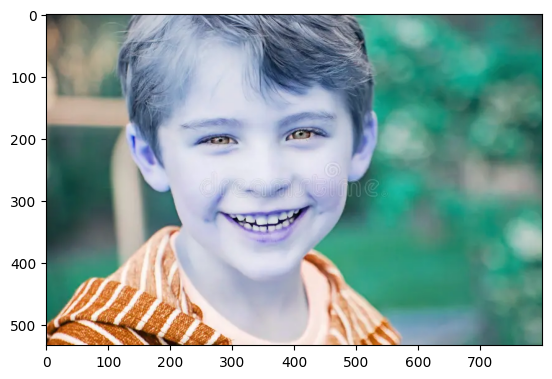

In [78]:
plt.imshow(img)

In [79]:
sample_img=img_to_array(img)

# Resize the image to match the model's input shape (e.g., 500)
sample_img = cv.resize(sample_img, (200, 200))

# Normalize the pixel values to the range [0, 1]
sample_img = sample_img.astype(np.float32) / 255.0

# Reshape the image to a single-sample batch with the appropriate shape
sample_img = np.expand_dims(sample_img, axis=0)

# Now you can use the model to predict on the sample_img
predictions = model.predict(sample_img)

1/1 [==============================] - 0s 37ms/step


In [80]:
predictions*100

array([[34.255207, 31.886179, 33.858616]], dtype=float32)

In [81]:
s={'Happy':predictions[0][0],
   'Sad':predictions[0][1],
   'Angery':predictions[0][2]}

In [82]:
pd.DataFrame([s],index=['Unknow Boys'])

,Happy,Sad,Angery
Unknow Boys,0.342552,0.318862,0.338586
